In [2]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import cv2 
from matplotlib import pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import neighbors, datasets
from math import sqrt
import PIL


In [3]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [4]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_Qantas_Airways_Boeing_717-200-125_new_plane718.svg.pngprocesses(process_array)


SyntaxError: invalid token (<ipython-input-4-851d512a21e1>, line 6)

In [5]:
liste1 = os.listdir('/home/hassan/ProjetInterpromo2020g8/images')
listmp = []
for fichier in liste1:
    if 'Seat'in fichier:
        listmp.append(fichier)
print(listmp)
# Image
img_rgb = cv2.imread('../LAYOUT SEATGURU/China_Southern_Boeing_737-800A_plane294.jpg',1) 
img_gray = cv2.imread('../LAYOUT SEATGURU/China_Southern_Boeing_737-800A_plane294.jpg',0) 
# Tamplates
for tmp in listmp:
    w, h = cv2.imread('images\\'+tmp,0 ).shape[::-1]
    # Found the tampales using methode TM_CCOEFF_NORMED
    res = cv2.matchTemplate(img_gray,cv2.imread('images\\'+tmp,0 ),cv2.TM_CCOEFF_NORMED) 
    THRESHOLD : float = 0.8
    # Detected the tamplate
    position = np.where( res >= THRESHOLD) 
    #faoire des rectangle sur les tamplate sur l'image 
    for pt in zip(*position[::]): 
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) 
    #montrer l'image avec detection de tamplate 
cv2.imshow('seats detected', img_rgb) 
cv2.waitKey()

FileNotFoundError: [Errno 2] No such file or directory: '/home/hassan/ProjetInterpromo2020g8/images'

[133, 134, 176, 202, 203, 261, 262, 202, 253, 254, 202, 253, 254, 176, 203, 176, 202, 203, 262, 133, 134, 176, 261, 262, 202, 202, 253, 254, 253, 254, 176, 203, 176, 203, 133, 134, 261, 262, 185, 244, 134, 135, 184, 211, 262, 263, 134, 135, 184, 211, 262, 263, 185, 185, 244, 185, 244, 184, 211, 184, 185, 211, 134, 135, 262, 263, 134, 135, 262, 263, 185, 185, 244]
73
[286, 286, 286, 286, 286, 286, 286, 319, 319, 319, 320, 320, 320, 351, 351, 352, 352, 352, 352, 353, 353, 353, 353, 353, 384, 385, 386, 386, 387, 387, 416, 416, 417, 417, 420, 420, 420, 420, 286, 286, 319, 319, 319, 319, 319, 319, 320, 320, 320, 320, 320, 320, 351, 352, 352, 353, 353, 384, 384, 385, 385, 385, 386, 386, 386, 386, 387, 387, 387, 387, 416, 417, 420]
73


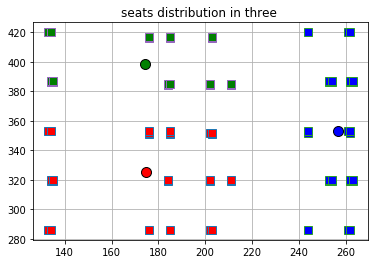

In [6]:
f = open('/home/hassan/Téléchargements/coord-Aer_Lingus_Airbus_A330-200_plane4-BusinessSeats.txt')
df = pd.DataFrame([line.replace('\n','').split(',') for line in f.readlines()])
df
c1=[]
c2=[]
for el in df[0].tolist():
    c1.append(int(el)) 
for el in df[1].tolist():
    c2.append(int(el)) 
print(c1)
print(len(c1))
print(c2)
print(len(c2))
n_clusters = 3
X = np.array(list(zip(c1, c2)))
kmeans = KMeans(n_clusters, random_state = 0).fit(X)
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

# Plot resultat
colors = ['red', 'blue','green','yellow','cyan','grey']
plt.figure()
for k, col in zip(range(n_clusters), colors):
    mon_element = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[mon_element, 0], X[mon_element, 1], 's',
            markerfacecolor=col, markersize=8)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=10)
plt.title('seats distribution in three ')    
plt.grid(True)
plt.show()

# using argpartition

In [3]:
plt.scatter(c1,c2,s=100)
X = np.array(list(zip(c1, c2)))
a = X[:,np.newaxis,:]
b = X[np.newaxis,:,:]
#print(a)
#print(b)
dif = abs(a-b)
#print(dif)
dif.shape
sq_dif = dif**2
sq_dif.shape
dis=sq_dif.sum(-1)
dis.shape
#print(dis)
k=5
nearest_seat=np.argpartition(dis,k,axis=1)
nearest_seat
for i in range(X.shape[0]):
    for j in nearest_seat[i,:k+1]:
        plt.plot(*zip(X[j],X[i]), color='orange')


NameError: name 'c1' is not defined

<_io.TextIOWrapper name='/home/hassan/Téléchargements/coord-Aer_Lingus_Airbus_A330-200_plane4-NormalSeats.txt' mode='r' encoding='UTF-8'>
gggggggg
       0      1
0    146    517
1    133    537
2    146    537
3    185    537
4    198    537
5    211    537
6    224    537
7    263    537
8    276    537
9    133    557
10   146    557
11   185    557
12   198    557
13   211    557
14   224    557
15   263    557
16   276    557
17   133    577
18   146    577
19   185    577
20   198    577
21   211    577
22   224    577
23   263    577
24   276    577
25   133    597
26   146    597
27   185    597
28   198    597
29   211    597
..   ...    ...
191  185   1111
192  198   1111
193  211   1111
194  224   1111
195  263   1111
196  276   1111
197  133   1131
198  146   1131
199  185   1131
200  198   1131
201  211   1131
202  224   1131
203  263   1131
204  276   1131
205  135   1151
206  148   1151
207  261   1151
208  274   1151
209  137   1171
210  150   1171
211  191   1171
212  

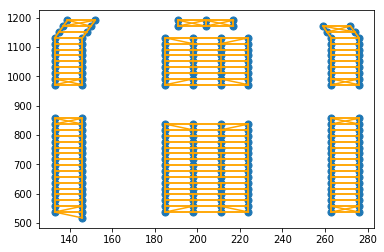

In [4]:
g = open('/home/hassan/Téléchargements/coord-Aer_Lingus_Airbus_A330-200_plane4-NormalSeats.txt')
dg = pd.DataFrame([line.replace('\n','').split(',') for line in g.readlines()])
dg
print(g)
print('gggggggg')
print(dg)
## coordinates of  economicclass seat
g1=[]
g2=[]
for el in dg[0].tolist():
    g1.append(int(el)) 
for el in dg[1].tolist():
    g2.append(int(el)) 
Y = np.array(list(zip(g1, g2)))
plt.scatter(g1,g2,s=50)
##found the nearest neibors of each seat
ga = Y[:,np.newaxis,:]
gb = Y[np.newaxis,:,:]
#distance ga -- gb
difg = abs(ga-gb)
#print(dif)
difg.shape
sq_difg = difg**2
sq_difg.shape
disg=sq_difg.sum(-1)
disg.shape
#print(dis)
k=3###  choise the distance of " neibors for each seat
nearest_seatg=np.argpartition(disg,k,axis=1)
for i in range(Y.shape[0]):
    for j in nearest_seatg[i,:k+1]:
        # plotting lines between neibors
        plt.plot(*zip(Y[j],Y[i]), color='orange')


In [ ]:
####### working on business class
X = np.array(list(zip(c1, c2)))
## coordinates of seats
Z=list(zip(c1, c2))
print(Z)
print(len(Z))
grp = [] # to save the different groupe of seats

## coordinates tamplate whiteseat
template = cv2.imread('./images/temp_business_seat_armrest_left.jpg', 0)
h, w = template.shape
print('coordinates of the tamplate seat',template.shape)
t1 = template.shape[1]
t0 = template.shape[0]
#### compared distance between seat y and other seats  in matrix Y with the dimension tamplate
for y in Z:
    grp.append([])
    grp[-1].append(y)
    for z in Z:
        if abs(y[0]-z[0])<t0 or abs(y[0]-z[0])<t1 or abs(y[1]-z[1])<t1 or abs(y[1]-z[1])<t0:
            grp[-1].append(z)
            Z.pop(Z.index(z))
# get diff groupes of seats
for t in range(len(grp)):
    print(len(grp[t]))
    print(grp)
# plotting each point groupe seats
listplotx=[]
listploty=[]
for j in range(len(grp)):
    listplotx.append([])
    listploty.append([])
    for k in range(len(grp[j])):
        listplotx[j].append(grp[j][k][0])
        listploty[j].append(grp[j][k][0])
    plt.scatter(listplotx[j],listploty[j],s=100)


In [ ]:
#### working on economiclass seats  
Z=list(zip(g1, g2))
print(Z)
print(len(Z))
#### compared distance between seat y and other seats  in matrix Y with the dimension tamplate
for y in Z:
    grp.append([])
    grp[-1].append(y)
    for z in Z:
        if abs(y[0]-z[0])<t0 or abs(y[0]-z[0])<t1 or abs(y[1]-z[1])<t1 or abs(y[1]-z[1])<t0:
            grp[-1].append(z)
            Z.pop(Z.index(z))

# get diff groupes of seats
for t in range(len(grp)):
    print(len(grp[t]))
# plotting each point groupe seats
listplotx=[]
listploty=[]
for j in range(len(grp)):
    listplotx.append([])
    listploty.append([])
    for k in range(len(grp[j])):
        listplotx[j].append(grp[j][k][0])
        listploty[j].append(grp[j][k][0])
    plt.scatter(listplotx[j],listploty[j],s=70)
    #plt.scatter(listplotx[j], listploty[j], c=labels, s=70, alpha=0.5)

###  contours detection ( incopmlit)

In [2]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import os

In [3]:
### input image
img = cv2.imread('../LAYOUT SEATGURU/Air_Tahiti_Nui_TN_Boeing_787-9_plane125.svg.png',1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#### transforme it to binary image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# find the contours from the thresholded binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# show countours vect 
for k in contours:
    print(k)
# draw all contours
img = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
##### show image with all contours
cv2.imshow('aircraft contours ', img)
cv2.waitKey()
cv2.destroyAllWindows()


[[[   0    0]]

 [[   0 1377]]

 [[ 424 1377]]

 [[ 424    0]]]
[[[ 143 1115]]

 [[ 144 1114]]

 [[ 145 1115]]

 [[ 144 1116]]]
[[[ 143 1025]]

 [[ 144 1024]]

 [[ 145 1025]]

 [[ 145 1026]]

 [[ 144 1027]]

 [[ 143 1026]]]
[[[ 143 1007]]

 [[ 144 1006]]

 [[ 145 1007]]

 [[ 144 1008]]]
[[[143 955]]

 [[144 954]]

 [[145 955]]

 [[144 956]]]
[[[143 937]]

 [[144 936]]

 [[145 937]]

 [[144 938]]]
[[[147 166]]

 [[148 165]]

 [[149 166]]

 [[148 167]]]
[[[276 157]]

 [[277 156]]

 [[278 157]]

 [[277 158]]]
[[[151 157]]

 [[152 156]]

 [[153 157]]

 [[152 158]]]
[[[211  31]]

 [[212  30]]

 [[217  30]]

 ...

 [[205  37]]

 [[205  36]]

 [[210  31]]]
[[[ 232 1183]]

 [[ 231 1184]]

 [[ 231 1218]]

 [[ 232 1219]]

 [[ 231 1220]]

 [[ 198 1220]]

 [[ 197 1221]]

 [[ 197 1238]]

 [[ 198 1239]]

 [[ 231 1239]]

 [[ 231 1220]]

 [[ 232 1219]]

 [[ 246 1219]]

 [[ 247 1218]]

 [[ 247 1217]]

 [[ 248 1216]]

 [[ 248 1214]]

 [[ 249 1213]]

 [[ 249 1212]]

 [[ 250 1211]]

 [[ 250 1209]]

 [[ 25

 [[233 697]]]
[[[219 695]]

 [[219 696]]

 [[220 696]]

 [[221 697]]

 [[221 707]]

 [[219 709]]

 [[211 709]]

 [[219 709]]

 [[220 708]]

 [[221 708]]

 [[221 697]]

 [[222 696]]

 [[223 697]]

 [[223 705]]

 [[224 706]]

 [[223 705]]

 [[223 697]]

 [[222 696]]

 [[222 695]]

 [[221 696]]

 [[220 696]]]
[[[207 695]]

 [[207 696]]

 [[208 697]]

 [[208 708]]

 [[207 709]]

 [[198 709]]

 [[207 709]]

 [[208 708]]

 [[208 697]]

 [[209 696]]

 [[210 696]]

 [[210 695]]

 [[209 696]]

 [[208 696]]]
[[[198 695]]

 [[196 697]]

 [[196 707]]

 [[196 697]]

 [[197 696]]

 [[198 696]]]
[[[183 695]]]
[[[164 695]]]
[[[152 695]]]
[[[232 691]]]
[[[197 691]]]
[[[140 690]]

 [[140 693]]

 [[145 693]]

 [[144 692]]

 [[145 691]]

 [[145 690]]]
[[[280 689]]

 [[280 697]]]
[[[273 689]]

 [[273 692]]

 [[274 693]]

 [[275 693]]

 [[275 692]]

 [[274 692]]

 [[273 691]]]
[[[260 689]]

 [[260 692]]

 [[262 692]]

 [[263 693]]

 [[263 692]]

 [[262 691]]

 [[262 690]]

 [[263 689]]]
[[[250 689]]

 [[250

In [4]:
#### functions for contours to get the largest contour and the cordonates of all contours points
print(len(contours))
print(contours[0][0][0][0])
def allcontours(contours):
    allcontours=[]
    for k in range(len(contours)):
        allcontours.append([])
        for i in range(len(contours[k])):
            allcontours[k].append((contours[k][i][0][0],contours[k][i][0][1]))
    return allcontours
print(allcontours(contours)) 
print('********* the largest contours')
def large_contour(contours):
    max=len(contours[0])
    ind_max=0
    for i in range(len(contours)-1):
        if len(contours[i+1])>len(contours[i]):
            max=len(contours[i+1])
            ind_max=i+1
    return contours[ind_max]
print(large_contour(contours))
print(len(large_contour(contours)))

1264
0
[[(0, 0), (0, 1377), (424, 1377), (424, 0)], [(143, 1115), (144, 1114), (145, 1115), (144, 1116)], [(143, 1025), (144, 1024), (145, 1025), (145, 1026), (144, 1027), (143, 1026)], [(143, 1007), (144, 1006), (145, 1007), (144, 1008)], [(143, 955), (144, 954), (145, 955), (144, 956)], [(143, 937), (144, 936), (145, 937), (144, 938)], [(147, 166), (148, 165), (149, 166), (148, 167)], [(276, 157), (277, 156), (278, 157), (277, 158)], [(151, 157), (152, 156), (153, 157), (152, 158)], [(211, 31), (212, 30), (217, 30), (218, 31), (219, 31), (222, 34), (222, 35), (225, 38), (225, 39), (227, 41), (227, 42), (229, 44), (229, 45), (230, 46), (230, 47), (231, 48), (231, 49), (233, 51), (233, 52), (234, 53), (234, 54), (235, 55), (235, 56), (236, 57), (236, 59), (237, 60), (237, 61), (238, 62), (238, 63), (239, 64), (239, 65), (240, 66), (240, 67), (241, 68), (241, 70), (242, 71), (242, 72), (243, 73), (243, 74), (244, 75), (244, 77), (245, 78), (245, 79), (246, 80), (246, 82), (247, 83), (24

In [ ]:
### plotting the largest contour
img = cv2.drawContours(img, large_contour(contours), -1, (0, 255, 0), 2)
##### show image with all contours
cv2.imshow('aircraft contours ', img)
cv2.waitKey()
cv2.destroyAllWindows()

##### Canny edge detection methode

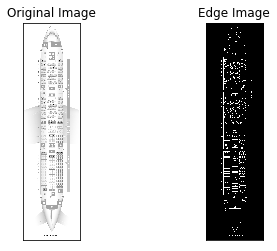

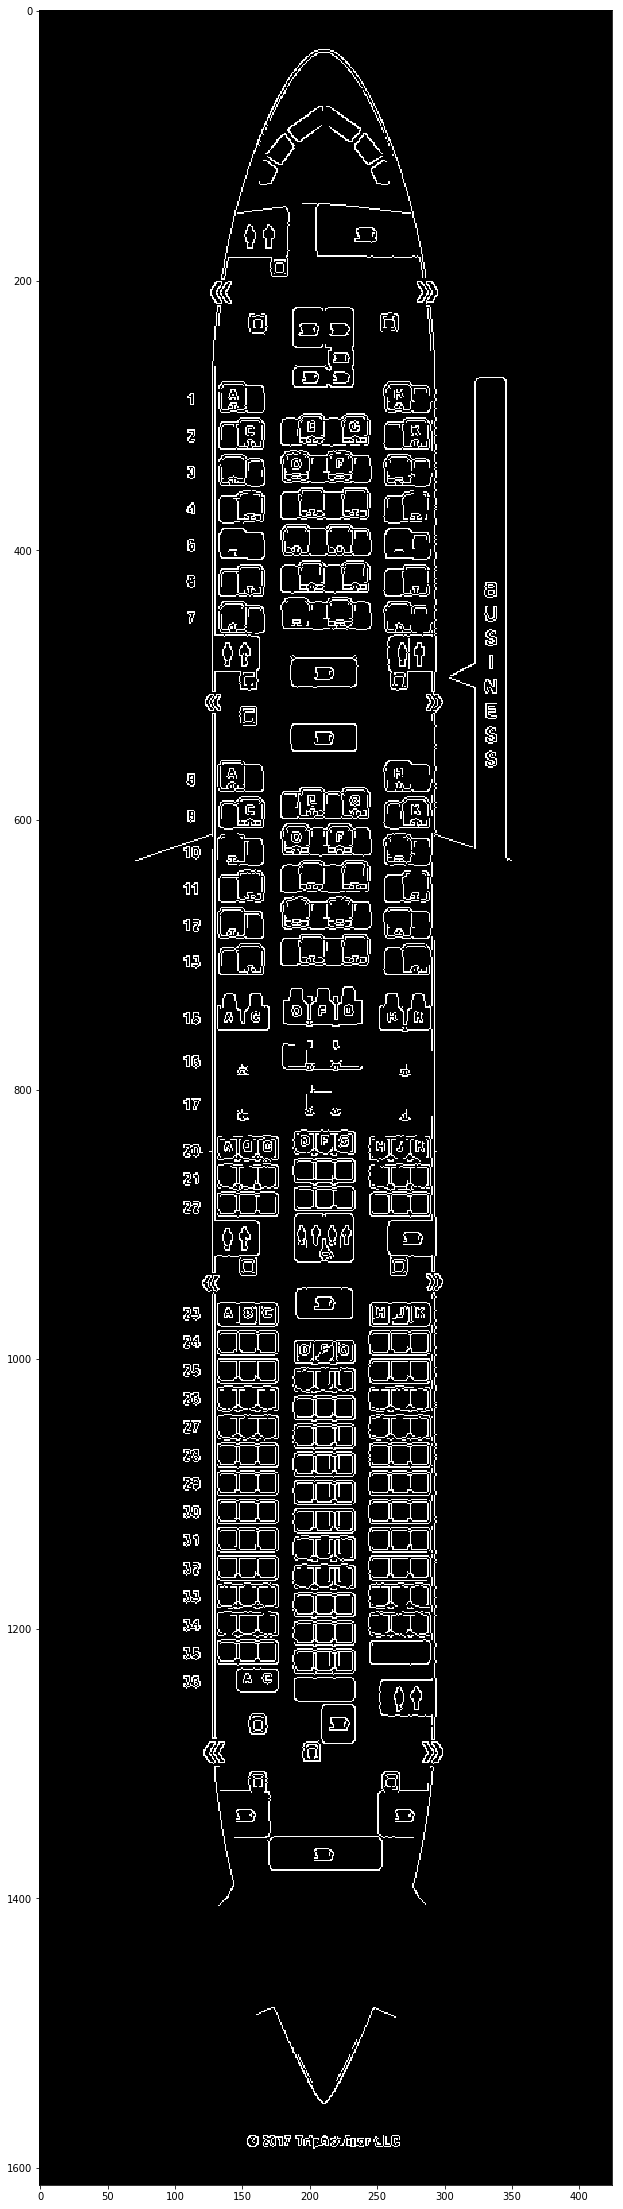

In [6]:
edges = cv2.Canny(gray,200,400)
kernel = np.ones((5,5),np.uint8)
# edges = cv2.dilate(edges ,kernel,iterations = 1)
# edges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
# edges = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
edges1 = cv2.morphologyEx(edges, cv2.MORPH_TOPHAT, kernel)
edges2 = cv2.morphologyEx(edges, cv2.MORPH_BLACKHAT, kernel)
edges = edges1 - edges2
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(40, 40))
plt.imshow(edges, cmap='gray')
plt.show()
# cv2.imshow('largest contour ',edges)
# cv2.waitKey()
# cv2.destroyAllWindows()

